## Adding Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

## Uploading CICIDS2017 dataset into Dataframe

In [ ]:
pd.set_option('mode.use_inf_as_na', True)
df = pd.read_csv("MachineLearningCVE.csv", skipinitialspace=True)
df.dropna(inplace=True)
#df.head()

## Changing Labels of Benign Packets to 1 and Rest to 0

In [ ]:
attack_or_not=[]
for i in df["Label"]:
    if i =="BENIGN":
        attack_or_not.append(1)
    else:
        attack_or_not.append(0)
df["Label"]=attack_or_not

In [ ]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2830739,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2830740,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2830741,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1


In [ ]:
df1 = df.drop(['Fwd Header Length.1'],axis=1)

In [ ]:
df.Label.value_counts()

1    2271320
0     556556
Name: Label, dtype: int64

<AxesSubplot:>

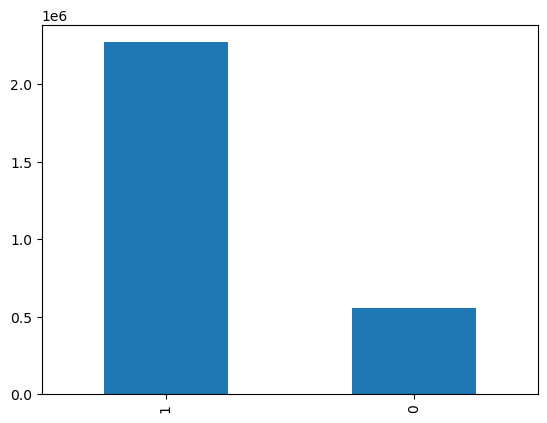

In [ ]:
df.Label.value_counts().plot.bar()

In [ ]:
df1

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2830739,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2830740,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2830741,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1


In [ ]:
data = df1

## Splitting the Dataset in Train_Test Dataframes and Scaling the Dataframes created using MinMax Scaler

In [ ]:
features = data.drop("Label", axis=1)
target = data["Label"]

x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, stratify=target
)

# use case is anomaly detection so use only the normal data for training
train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]

# min max scale the input data
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

## Creating Autoencoder Architecture for Anomaly Detection

In [ ]:
# create a model by subclassing Model class in tensorflow
class AutoEncoder(Model):
  """
  Parameters
  ----------
  output_units: int
    Number of output units

  code_size: int
    Number of units in bottle neck
  """

  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])

  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

model = AutoEncoder(output_units=x_train_scaled.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

with tf.device('/CPU:0'):
    history = model.fit(
        x_train_scaled,
        x_train_scaled,
        epochs=15,
        batch_size=128,
        validation_data=(x_test_scaled, x_test_scaled)
    )

Epoch 1/15
14196/14196 [==============================] - 43s 3ms/step - loss: 0.0016 - mse: 0.0029 - val_loss: 0.0020 - val_mse: 0.0036
Epoch 2/15
14196/14196 [==============================] - 40s 3ms/step - loss: 8.0262e-04 - mse: 0.0014 - val_loss: 0.0020 - val_mse: 0.0037
Epoch 3/15
14196/14196 [==============================] - 40s 3ms/step - loss: 7.0890e-04 - mse: 0.0013 - val_loss: 0.0019 - val_mse: 0.0035
Epoch 4/15
14196/14196 [==============================] - 39s 3ms/step - loss: 6.7653e-04 - mse: 0.0012 - val_loss: 0.0018 - val_mse: 0.0032
Epoch 5/15
14196/14196 [==============================] - 39s 3ms/step - loss: 6.5772e-04 - mse: 0.0012 - val_loss: 0.0019 - val_mse: 0.0034
Epoch 6/15
14196/14196 [==============================] - 39s 3ms/step - loss: 6.1646e-04 - mse: 0.0011 - val_loss: 0.0019 - val_mse: 0.0036
Epoch 7/15
14196/14196 [==============================] - 39s 3ms/step - loss: 5.8203e-04 - mse: 0.0011 - val_loss: 0.0019 - val_mse: 0.0034
Epoch 8/15
14196/

## Plotting the Train - Val Loss Graph of the Trained Autoencoder Model

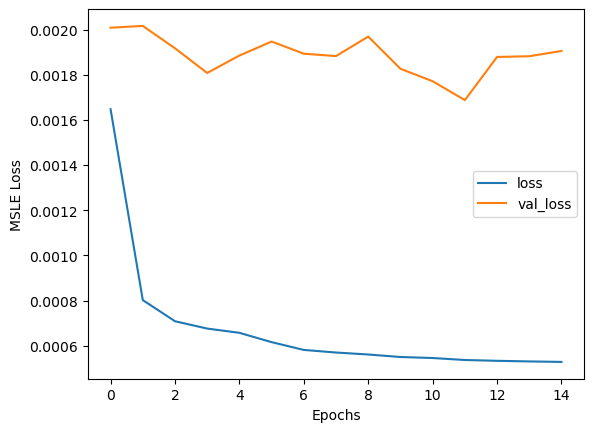

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

## Finding the Anomaly Threshold and Accuracy of Autoencoder Model using the Test Dataset

In [ ]:
def find_threshold(model, x_train_scaled):
  with tf.device('/CPU:0'):
      reconstructions = model.predict(x_train_scaled)
      # provides losses of individual instances
      reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
      # threshold for anomaly scores
      threshold = np.mean(reconstruction_errors.numpy()) \
          + np.std(reconstruction_errors.numpy())
      return threshold

def get_predictions(model, x_test_scaled, threshold):
  with tf.device('/CPU:0'):
      predictions = model.predict(x_test_scaled)
      # provides losses of individual instances
      errors = tf.keras.losses.msle(predictions, x_test_scaled)
      # 0 = anomaly, 1 = normal
      anomaly_mask = pd.Series(errors) > threshold
      preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
      return preds

threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")
# Threshold: 0.001801019894661588
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)
# 0.8577609375221014

56783/56783 [==============================] - 19917s 351ms/step
Threshold: 0.001801019894661588
17675/17675 [==============================] - 43s 2ms/step


0.8577609375221014

## Saving the Object Files

In [ ]:
!pip install joblib

In [ ]:
import joblib
joblib.dump(min_max_scaler, open('anomaly_scaler.obj', 'wb'))
model.save_weights('Anomaly_autoenc_weights',save_format='tf')